# DEVNAGRI CHARACTER DATASET

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import cv2
import numpy as np
from operator import itemgetter
from sklearn.model_selection import train_test_split


In [8]:
url='data.csv'
df=pd.read_csv(url)
df

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [9]:
X= df.iloc[:, 0:-1]
y = df.iloc[:, -1]
mapping_to_numbers = {}
y1 = np.zeros((len(y)))
for i, raw_label in enumerate(y):
    if raw_label not in mapping_to_numbers:
        mapping_to_numbers[raw_label] = len(mapping_to_numbers)
    y1[i] = mapping_to_numbers[raw_label]
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.33)
y_train

mapping_to_numbers

{'character_01_ka': 0,
 'character_02_kha': 1,
 'character_03_ga': 2,
 'character_04_gha': 3,
 'character_05_kna': 4,
 'character_06_cha': 5,
 'character_07_chha': 6,
 'character_08_ja': 7,
 'character_09_jha': 8,
 'character_10_yna': 9,
 'character_11_taamatar': 10,
 'character_12_thaa': 11,
 'character_13_daa': 12,
 'character_14_dhaa': 13,
 'character_15_adna': 14,
 'character_16_tabala': 15,
 'character_17_tha': 16,
 'character_18_da': 17,
 'character_19_dha': 18,
 'character_20_na': 19,
 'character_21_pa': 20,
 'character_22_pha': 21,
 'character_23_ba': 22,
 'character_24_bha': 23,
 'character_25_ma': 24,
 'character_26_yaw': 25,
 'character_27_ra': 26,
 'character_28_la': 27,
 'character_29_waw': 28,
 'character_30_motosaw': 29,
 'character_31_petchiryakha': 30,
 'character_32_patalosaw': 31,
 'character_33_ha': 32,
 'character_34_chhya': 33,
 'character_35_tra': 34,
 'character_36_gya': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_

In [13]:
X_train=X_train.reshape((61640,32,32))
X_test=X_test.reshape((30360,32,32))


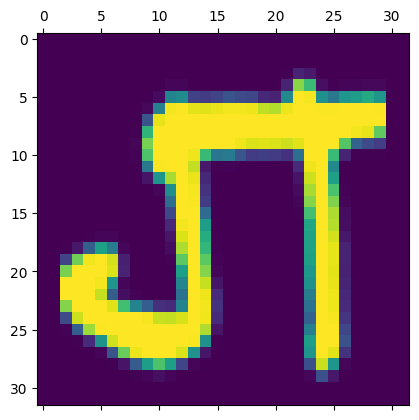

In [14]:
plt.matshow(X_train[15])

In [15]:

y_train[15]


2.0

In [16]:
y_train

array([25., 45., 44., ..., 30., 40., 13.])

In [17]:
Xtrain=X_train/255
Xtest=X_test/255

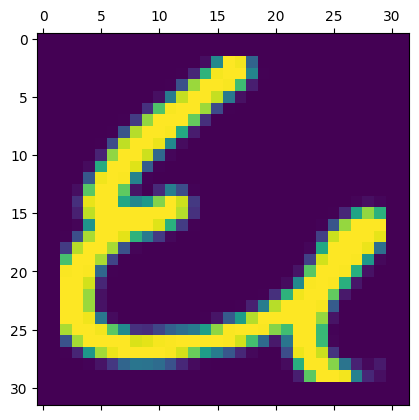

In [18]:
plt.matshow(Xtrain[39])

# **MODEL PREPARATION STARTS :**

ADDING A HIDDEN LAYER IN BETWEEN

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(Xtrain,y_train,epochs=4,validation_data=(Xtest,y_test))



Epoch 1/4
1927/1927 [==============================] - 134s 69ms/step - loss: 1.0597 - accuracy: 0.6957 - val_loss: 0.2629 - val_accuracy: 0.9266
Epoch 2/4
1927/1927 [==============================] - 139s 72ms/step - loss: 0.4677 - accuracy: 0.8554 - val_loss: 0.1702 - val_accuracy: 0.9515
Epoch 3/4
1927/1927 [==============================] - 139s 72ms/step - loss: 0.3535 - accuracy: 0.8899 - val_loss: 0.1334 - val_accuracy: 0.9600
Epoch 4/4
1681/1927 [=========================>....] - ETA: 15s - loss: 0.2848 - accuracy: 0.9099

In [29]:
model.evaluate(Xtest,y_test) 

949/949 [==============================] - 16s 17ms/step - loss: 0.1335 - accuracy: 0.9618


[0.13352523744106293, 0.9617918133735657]

949/949 [==============================] - 12s 13ms/step


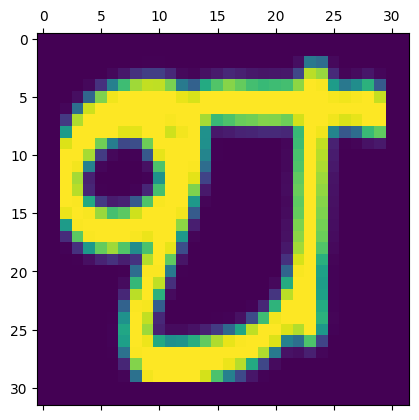

In [41]:
y_pred=model.predict(Xtest)
y_pred_label=[np.argmax(i) for i in y_pred]
plt.matshow(Xtest[1])


[1.24977871e-12 4.59704580e-10 9.99207462e-18 2.12872715e-06
 1.94011163e-09 6.33143223e-13 2.14517016e-07 6.77456612e-15
 1.33189649e-11 1.28596989e-13 6.54588078e-14 1.79835069e-15
 4.54280117e-15 1.01468460e-11 9.65802891e-15 3.81296015e-14
 1.71804945e-10 8.01499755e-10 2.09385644e-06 7.14796555e-10
 5.54510013e-16 4.01459180e-16 2.11028464e-06 9.15484147e-11
 9.57812321e-14 1.70180493e-13 1.27119154e-13 2.58701505e-10
 9.38127839e-11 1.80864923e-08 4.57475002e-10 2.90129272e-08
 2.45242700e-06 9.99990225e-01 1.37046180e-10 7.27899703e-07
 2.69162216e-16 7.90670779e-17 1.10758211e-13 4.88434651e-13
 1.17168506e-08 1.59503539e-11 1.95895278e-09 1.18534934e-12
 1.23535605e-14 2.71091882e-11]
33


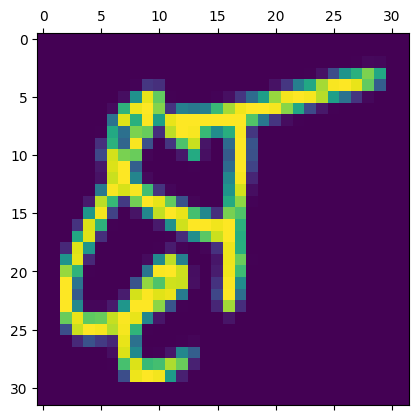

In [42]:
plt.matshow(Xtest[3])
print(y_pred[3])
print(y_pred_label[3])

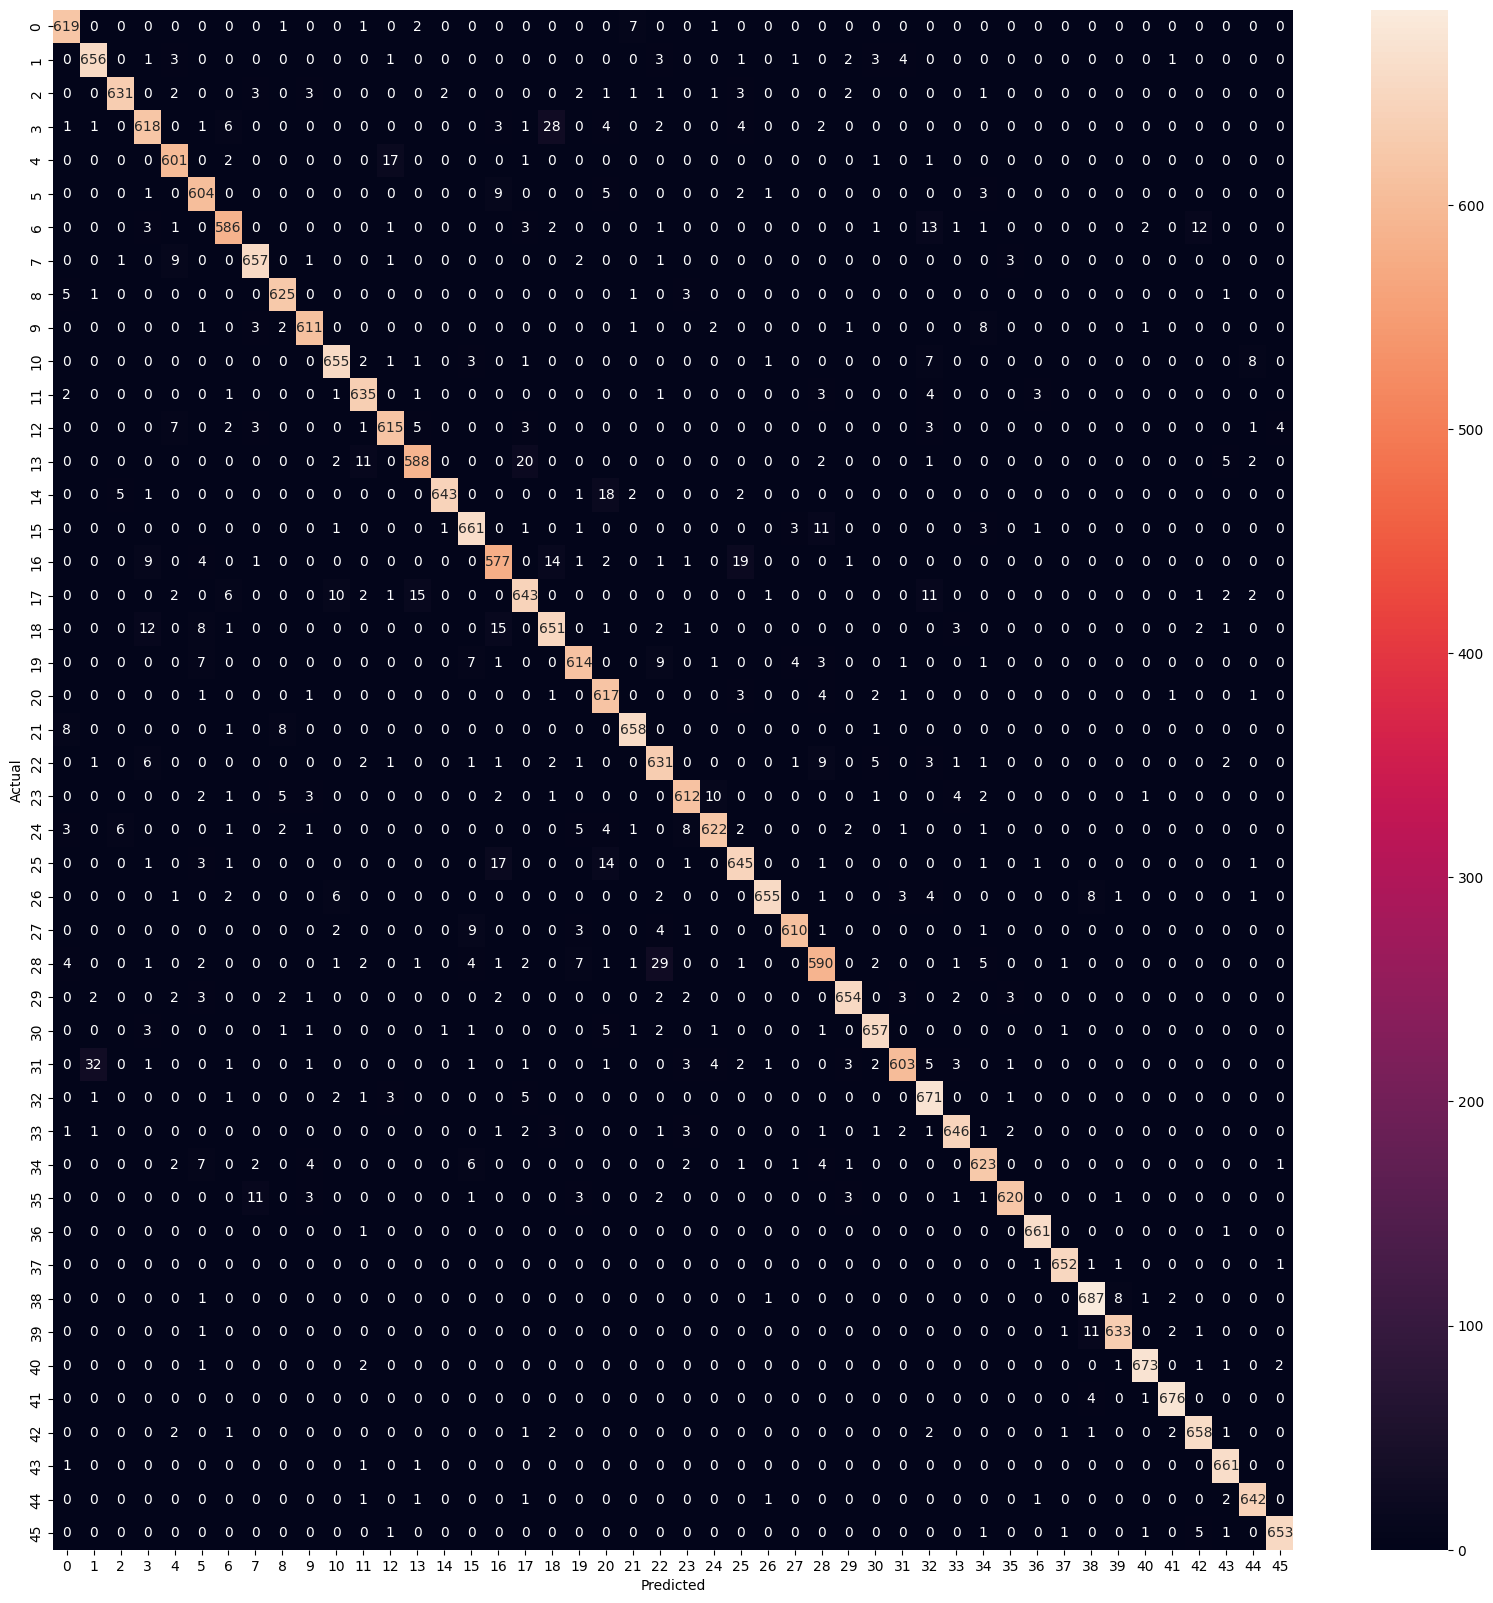

In [31]:
import seaborn as sns
plt.figure(figsize=(20,20))
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:
joblib.dump(model, 'final_model1.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-05 23:34:28         3190
metadata.json                                  2022-12-05 23:34:28           64
v

['final_model1.pkl']

# **HANDRAWN IMAGE PREPROCESSING**

In [44]:
def convert(output):
    if(output==0):
        print("क")
    elif output==1:
        print("ख")
    elif output==2:
        print("ग")
    elif output==3:
        print("घ")
    elif output==4:
        print("ङ")
    elif output==5:
         print("च")
    elif output==6:
        print("छ")
    elif output==7:
        print("ज")
    elif output==8:
        print("झ")
    elif output==9:
        print("ञ")
    elif output==10:
        print("ट")
    elif output==11:
        print("ठ")
    elif output==12:
        print("ड")
    elif output==13:
        print("ढ")
    elif output==14:
        print("ण")
    elif output==15:
        print("त")
    elif output==16:
        print("थ")
    elif output==17:
        print("द")
    elif output==18:
        print("ध")
    elif output==19:
        print("न")
    elif output==20:
        print("प")
    elif output==21:
        print("फ")
    elif output==22:
        print("ब")
    elif output==23:
        print("भ")
    elif output==24:
        print("म")
    elif output==25:
        print("य")
    elif output==26:
        print("र")
    elif output==27:
        print("ल")
    elif output==28:
        print("व")
    elif output==29:
        print("श")
    elif output==30:
        print("ष")
    elif output==31:
        print("स")
    elif output==32:
        print("ह")
    elif output==33:
        print("क्ष")
    elif output==34:
        print("त्र")
    elif output==35:
        print("ज्ञ")
    elif output==36:
        print("०")
    elif output==37:
        print("१")
    elif output==38:
        print("२")
    elif output==39:
        print("३")  
    elif output==40:
        print("४")
    elif output==41:
        print("५")
    elif output==42:
        print("६")
    elif output==43:
        print("७")
    elif output==44:
        print("८")
    elif output==45:
        print("९")

    return output 
        

In [37]:
def get_sample_image(filename='hindi2.jpeg'):
    return cv2.imread(filename, 0) #grayscale image 

def binarize(img=get_sample_image()):
    thresh = cv2.adaptiveThreshold(img, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 21,4)
    return thresh


def find_digits(binary_img):
    inv = cv2.bitwise_not(binary_img)
    contours, hierarchy = cv2.findContours(inv,
                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
    digits = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:
            [x, y, w, h] = cv2.boundingRect(cnt)
            margin = 20
            x -= margin
            y -= margin
            w += margin*2
            h += margin*2

            figure = binary_img[y: y + h, x: x + w]
            if figure.size > 0:
                digits.append({
                    'image': figure,
                    'x': x,
                    'y': y,
                    'w': w,
                    'h': h,
                })

    return digits


def resize_digits(digits):
    digits = map(itemgetter('image'), sorted(digits, key=itemgetter('x')))
    blur_kernel = np.ones((4, 4), np.float32)/(4*4)
    erode_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    return [
        cv2.resize(
            cv2.bitwise_not(
                cv2.filter2D(
                    cv2.erode(digit, erode_kernel, iterations=1),
                    -1, blur_kernel)
            ),
            (25, 25))
        for digit in digits]


def insert_into_center(resized_digits):
    results = []
    for img in resized_digits:
        i = np.zeros((32, 32))
        M = cv2.moments(img)
        try:
            xc = M['m10'] / M['m00']
            yc = M['m01'] / M['m00']
        except ZeroDivisionError:
            xc = 10
            yc = 10

        start_a = max(min(4 + (10 - int(yc)), 8), 0)
        start_b = max(min(4 + (10 - int(xc)), 8), 0)
        i[start_a:start_a+25, start_b:start_b+25] = img

        results.append(i)
    return results

In [38]:
def draw_contours(frame, contours):
    for img in contours:
        im=cv2.rectangle(
            frame,
            (img['x'], img['y']),
            (img['x'] + img['w'], img['y'] + img['h']),
            (0, 0, 0),
            4
        )

def preprocess(digits):
    return np.vstack([digit.reshape((1,32,32,1)).astype(np.float64)/255
                      for digit in digits])

def static_image_ocr():
    frame = get_sample_image()
    contours = find_digits(binarize(frame.copy()))
    draw_contours(frame, contours)
    digits = insert_into_center(resize_digits(contours))
    X = preprocess(digits)
    y_pred_X = model.predict(X)
    y_pred_label_X = [np.argmax(i) for i in y_pred_X]
    plt.matshow(frame)
    plt.matshow(binarize(frame.copy()))
    for i,l1 in enumerate(X):
        plt.matshow(X[i])

    print("Total output:")
   
    result=[]
    for i in y_pred_label_X:
        result.append(convert(i))

    

1/1 [==============================] - 0s 42ms/step
Total output:
ख
प
ध


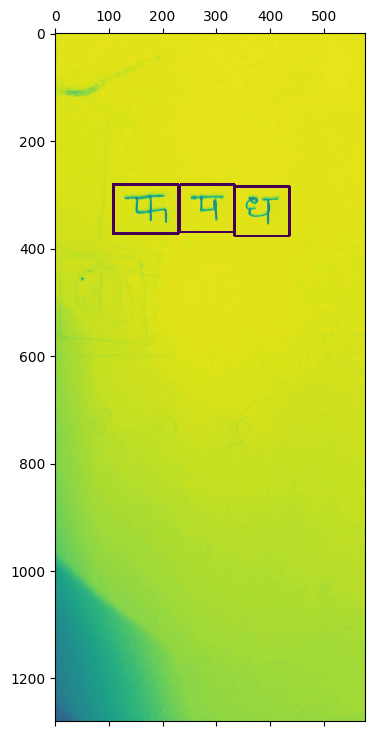

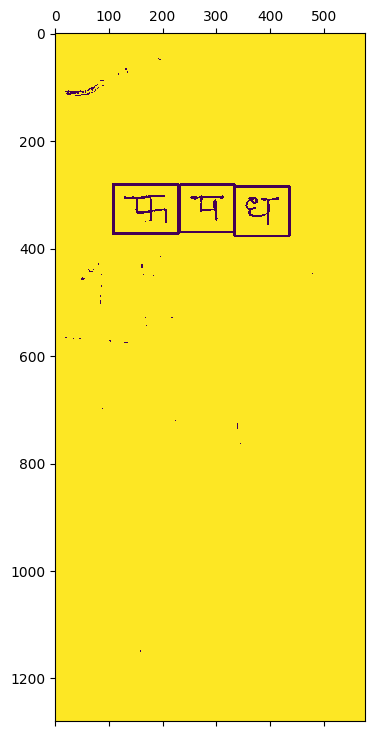

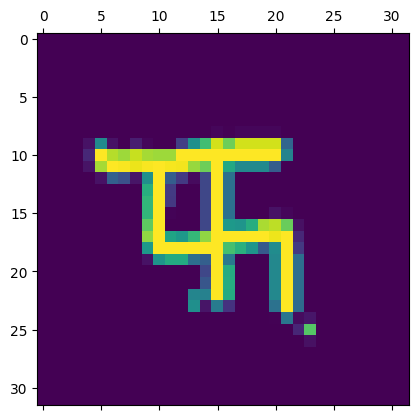

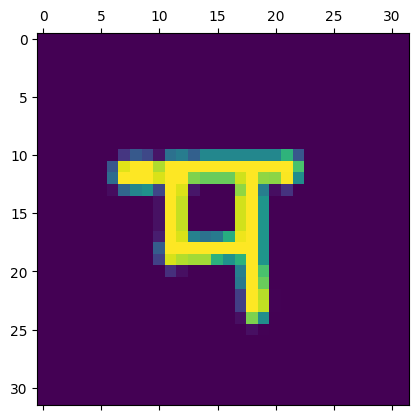

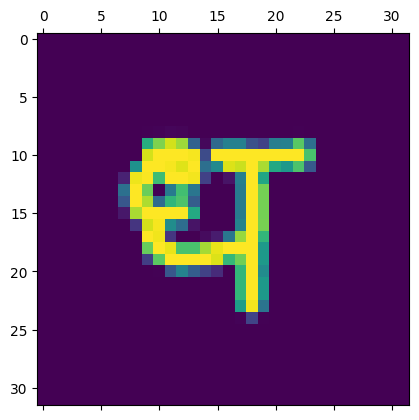

In [39]:
static_image_ocr()